In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [ ]:
# Normalize pixel values to the range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Reshape the images to include a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8842 - loss: 0.3744 - val_accuracy: 0.9800 - val_loss: 0.0655
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9822 - loss: 0.0568 - val_accuracy: 0.9870 - val_loss: 0.0483
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9892 - loss: 0.0361 - val_accuracy: 0.9867 - val_loss: 0.0432
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9913 - loss: 0.0285 - val_accuracy: 0.9895 - val_loss: 0.0365
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9941 - loss: 0.0199 - val_accuracy: 0.9870 - val_loss: 0.0453


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9851 - loss: 0.0460
Test accuracy: 0.9886999726295471


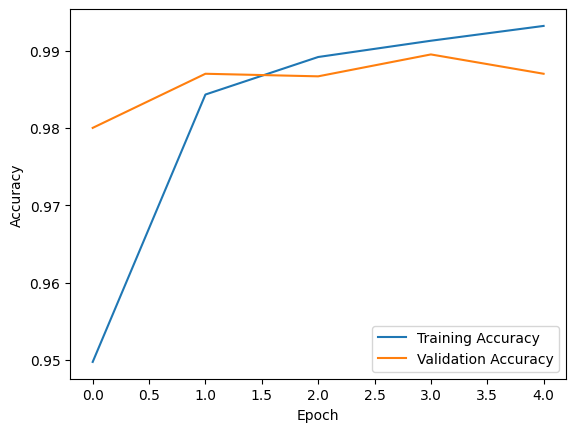

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save the model
model.save("handwritten_digit_cnn.h5")

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import time

# Get predictions for the test set
start_time = time.time()
predictions = model.predict(test_images)
inference_time = (time.time() - start_time) / len(test_images) * 1000

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
# Convert predictions to class labels
predicted_labels = predictions.argmax(axis=1)

In [ ]:
# Compute metrics
accuracy = test_acc * 100
precision = precision_score(test_labels, predicted_labels, average='weighted') * 100
recall = recall_score(test_labels, predicted_labels, average='weighted') * 100
f1 = f1_score(test_labels, predicted_labels, average='weighted')

In [ ]:
print(f"Accuracy (%): {accuracy}")
print(f"Precision (%): {precision}")
print(f"Recall (%): {recall}")
print(f"F1 Score: {f1}")
print(f"Inference Time (ms per image): {inference_time}")


Accuracy (%): 98.86999726295471
Precision (%): 98.87962598485997
Recall (%): 98.87
F1 Score: 0.9886771475568192
Inference Time (ms per image): 0.26475746631622316


In [ ]:
# Additional stats
model_size_mb = model.count_params() * 4 / (1024 ** 2)  # Model size in MB (approximation)
print(f"Model Size (MB): {model_size_mb}")

Model Size (MB): 0.35599517822265625


In [ ]:
fps = 1 / (inference_time / 1000)  # Convert ms to seconds
print(f"FPS: {fps}")


FPS: 3777.0417352672953


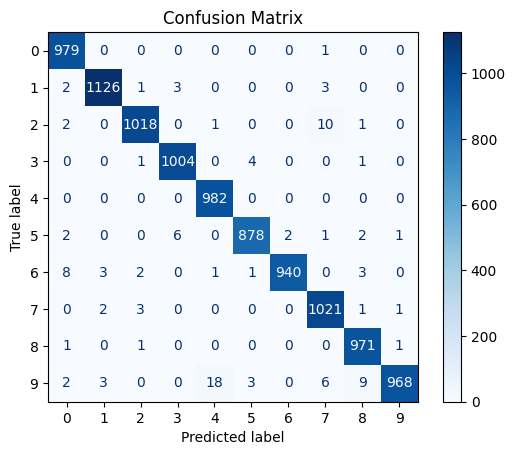

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate predictions
predicted_labels = predictions.argmax(axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display confusion matrix as an image
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
